Cho bộ dữ liệu ở đường link

[Heart Disease - UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

hãy thực hiện các yêu cầu sau:
1. Sử dụng thống kê mô tả, mô tả về bộ dữ liệu trên với min, max, std, avg,…    


In [42]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# # metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 

In [43]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [44]:
import pandas as pd

# Tạo dataframe từ dữ liệu và target
df = pd.DataFrame(data=X, columns=heart_disease.feature_names)
df['target'] = y

description = df.describe().T

description

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [45]:
X = X.copy()

2. Trực quan hóa dữ liệu với các biểu đồ grid line, box, histogram, và scatter matrix

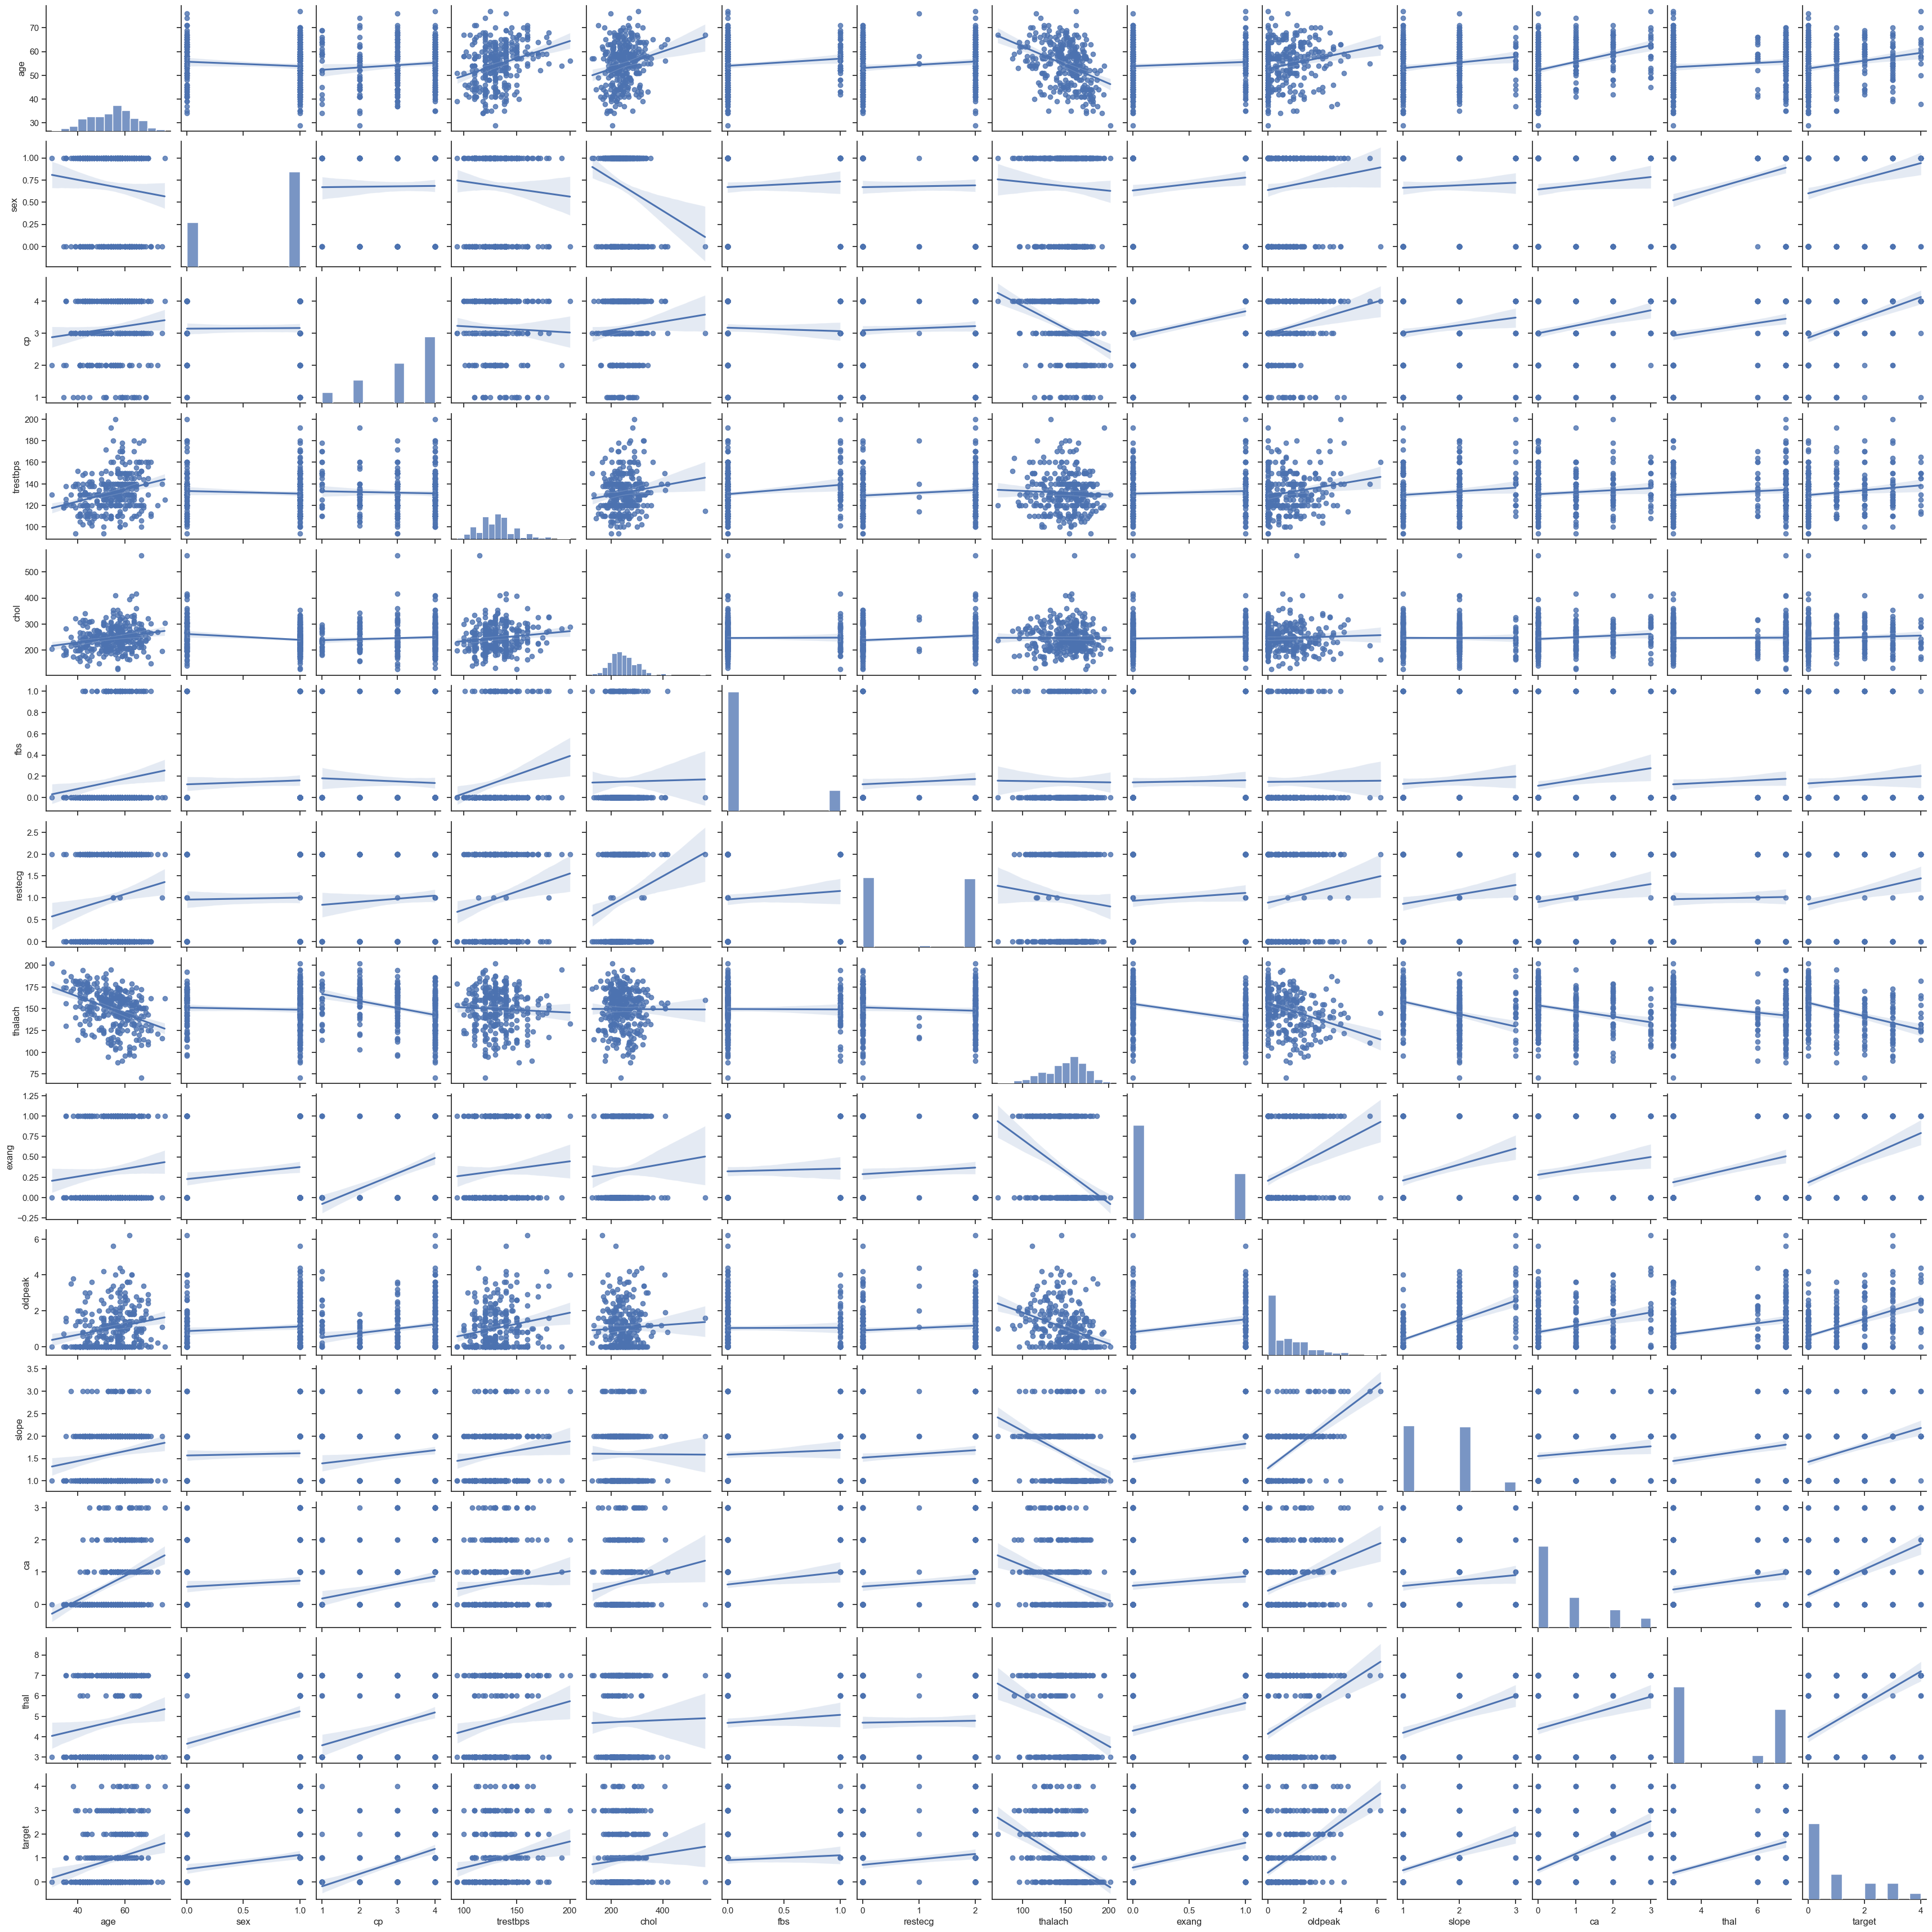

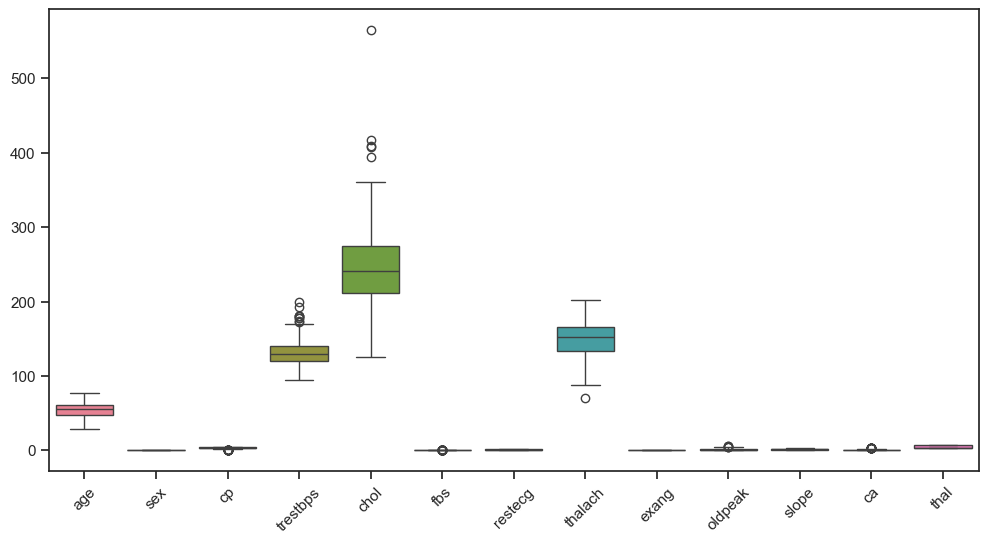

<Figure size 1200x600 with 0 Axes>

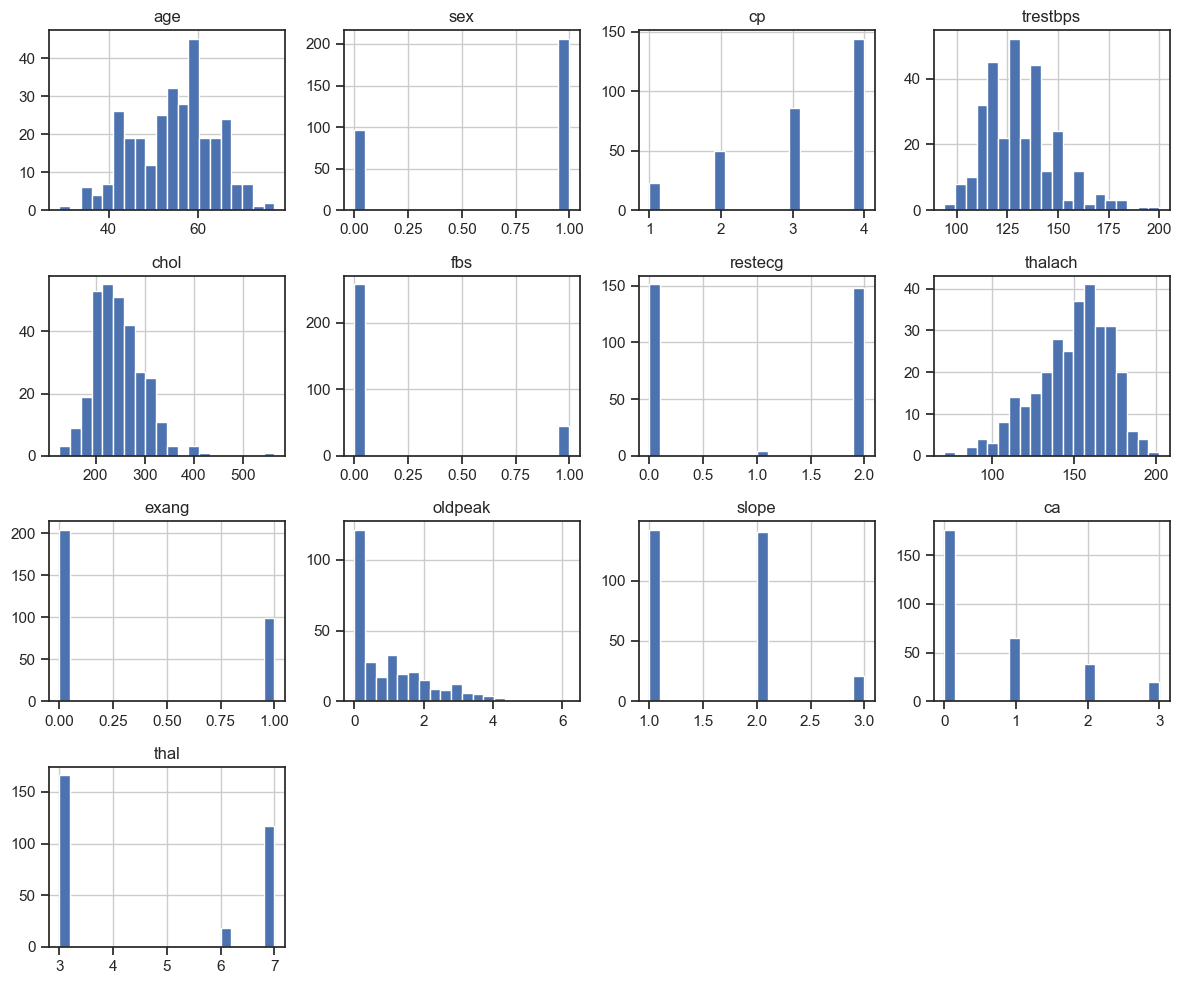

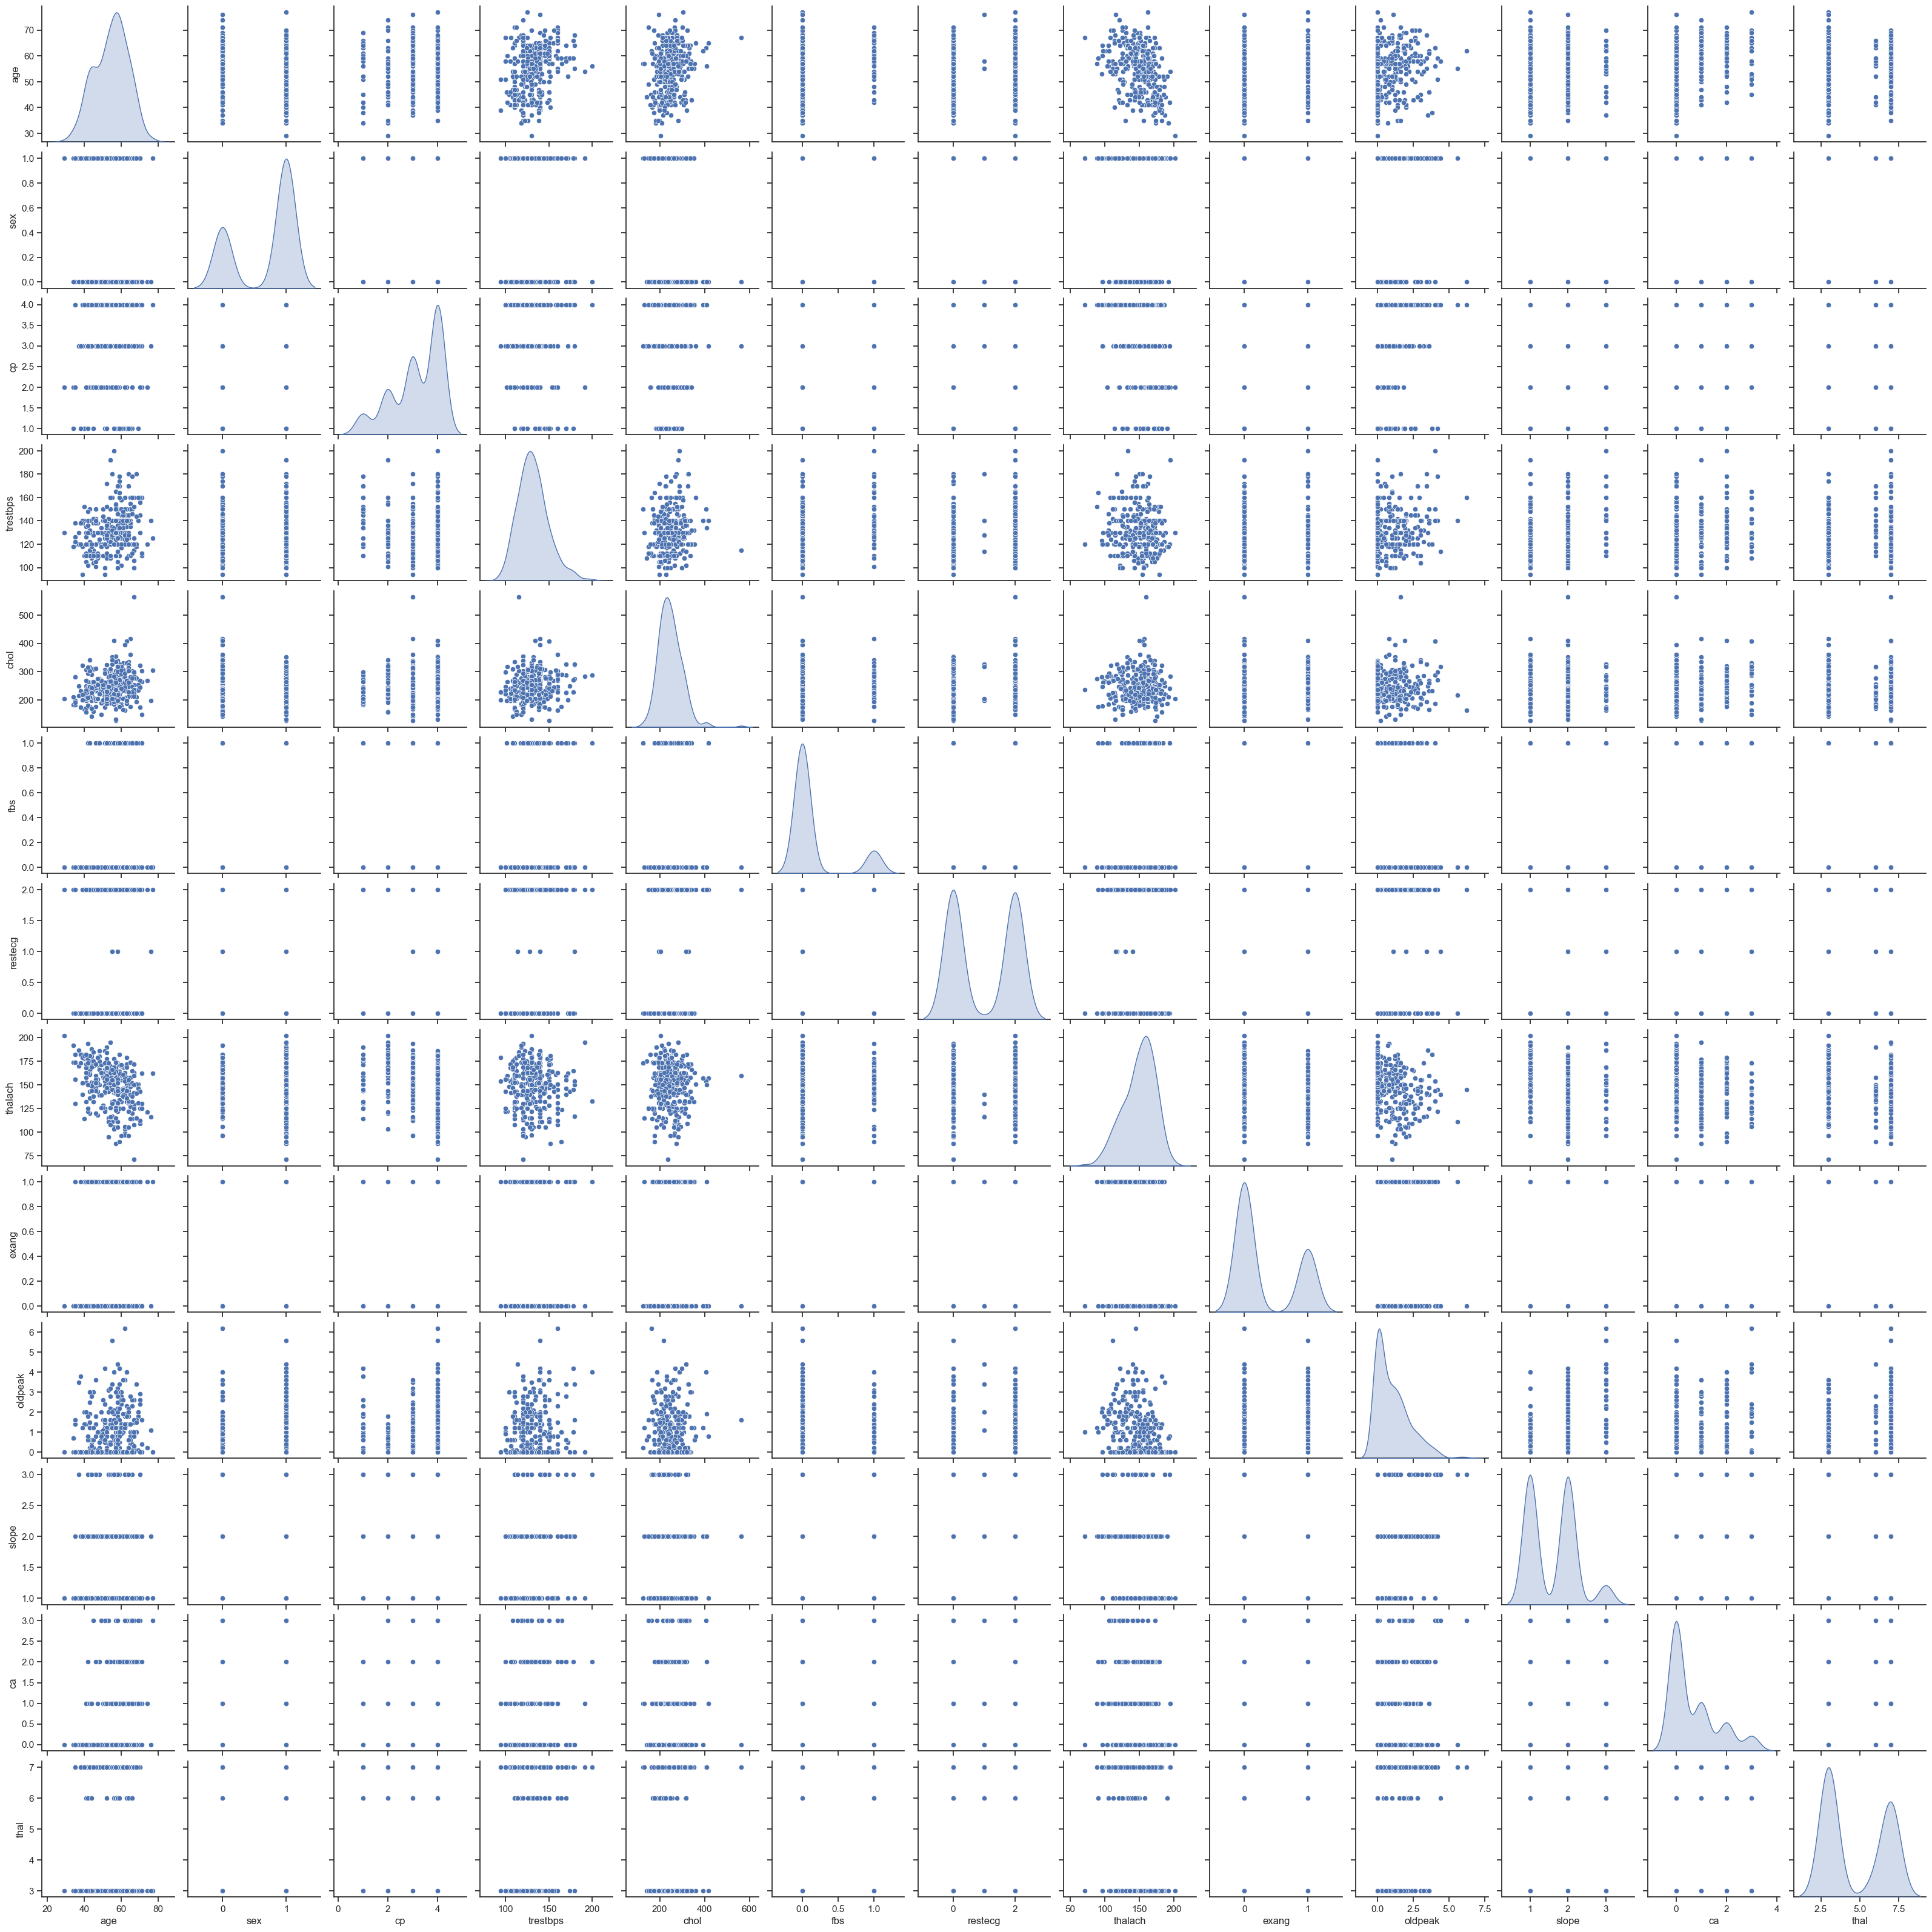

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="ticks")

# Grid line plots
sns.pairplot(df, kind="reg")
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['target']))
plt.xticks(rotation=45)
plt.show()

# Histograms
plt.figure(figsize=(12, 6))
df.drop(columns=['target']).hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Scatter matrix
sns.pairplot(df.drop(columns=['target']), diag_kind='kde')
plt.show()


3. Cho biết những dữ liệu còn thiếu và đề xuất cách xử lý dữ liệu thiếu đó một cách tự động, lưu bộ dữ liệu đã xử lý dữ liệu thiếu sử dụng cho các ý tiếp theo  


In [47]:
# Kiểm tra dữ liệu thiếu
missing_data = df.isnull().sum()
print("Missing data:")
print(missing_data)

# Xử lý dữ liệu thiếu tự động
# Ở đây, chúng ta sẽ điền các giá trị thiếu bằng giá trị xuất hiện nhiều nhất trong cột
df.fillna(df.mode().iloc[0], inplace=True)

Missing data:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


4. Chia bộ dữ liệu thành 2 phần Train/Test với các tỉ lệ 8:2 và 7:3 


In [51]:
# 4. Chia bộ dữ liệu thành 2 phần Train/Test với các tỉ lệ 8:2 và 7:3 

from sklearn.model_selection import train_test_split

# Chia bộ dữ liệu thành Train/Test theo tỉ lệ 8:2
X_train_8_2, X_test_8_2, y_train_8_2, y_test_8_2 = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

# Chia bộ dữ liệu thành Train/Test theo tỉ lệ 7:3
X_train_7_3, X_test_7_3, y_train_7_3, y_test_7_3 = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.3, random_state=42)

5. Đánh giá bộ dữ liệu bằng phương pháp 5 fold và 10-Fold (k-fold) với giải thuật
Bayes, nhận xét về các kết quả đạt được 


In [52]:
# 5. Đánh giá bộ dữ liệu bằng phương pháp 5 fold và 10-Fold (k-fold) với giải thuật Bayes, nhận xét về các kết quả đạt được 

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Đánh giá bộ dữ liệu bằng phương pháp 5-fold cross-validation
scores_5_fold = cross_val_score(naive_bayes, df.drop(columns=['target']), df['target'], cv=5)
print("Điểm số 5-Fold Cross-Validation: \n", scores_5_fold)
print("Điểm số trung bình (5-Fold): ", scores_5_fold.mean())

# Đánh giá bộ dữ liệu bằng phương pháp 10-fold cross-validation
scores_10_fold = cross_val_score(naive_bayes, df.drop(columns=['target']), df['target'], cv=10)
print("Điểm số 10-Fold Cross-Validation: \n", scores_10_fold)
print("Điểm số trung bình (10-Fold):", scores_10_fold.mean())

Điểm số 5-Fold Cross-Validation: 
 [0.57377049 0.57377049 0.47540984 0.56666667 0.58333333]
Điểm số trung bình (5-Fold):  0.5545901639344263
Điểm số 10-Fold Cross-Validation: 
 [0.5483871  0.58064516 0.51612903 0.5        0.53333333 0.4
 0.56666667 0.56666667 0.6        0.53333333]
Điểm số trung bình (10-Fold): 0.534516129032258


6. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với giải thuật Linear Regression với bộ dữ liệu với 2 tỉ lệ ở trên.  


In [53]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regression = LinearRegression()

# Huấn luyện mô hình với tỉ lệ Train/Test là 8:2
linear_regression.fit(X_train_8_2, y_train_8_2)

# Đánh giá mô hình trên dữ liệu kiểm tra
score_8_2 = linear_regression.score(X_test_8_2, y_test_8_2)
print("Điểm số trên dữ liệu kiểm tra (8:2):", score_8_2)

# Huấn luyện mô hình với tỉ lệ Train/Test là 7:3
linear_regression.fit(X_train_7_3, y_train_7_3)

# Đánh giá mô hình trên dữ liệu kiểm tra
score_7_3 = linear_regression.score(X_test_7_3, y_test_7_3)
print("Điểm số trên dữ liệu kiểm tra (7:3):", score_7_3)


Điểm số trên dữ liệu kiểm tra (8:2): 0.5719135748247215
Điểm số trên dữ liệu kiểm tra (7:3): 0.5249824155975742


7. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với giải thuật Bayes với bộ dữ
liệu với 2 tỉ lệ ở trên.    


In [76]:
# 7. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với giải thuật Bayes với bộ dữ liệu với 2 tỉ lệ ở trên.    

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Naive Bayes
naive_bayes = GaussianNB()

# Huấn luyện mô hình với tỉ lệ Train/Test là 8:2
naive_bayes.fit(X_train_8_2, y_train_8_2)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_8_2 = naive_bayes.predict(X_test_8_2)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy_8_2 = accuracy_score(y_test_8_2, y_pred_8_2)
print("Độ chính xác trên dữ liệu kiểm tra (8:2):", accuracy_8_2)

# Huấn luyện mô hình với tỉ lệ Train/Test là 7:3
naive_bayes.fit(X_train_7_3, y_train_7_3)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_7_3 = naive_bayes.predict(X_test_7_3)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy_7_3 = accuracy_score(y_test_7_3, y_pred_7_3)
print("Độ chính xác trên dữ liệu kiểm tra (7:3):", accuracy_7_3)


Độ chính xác trên dữ liệu kiểm tra (8:2): 0.4918032786885246
Độ chính xác trên dữ liệu kiểm tra (7:3): 0.43956043956043955


8. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với giải thuật SVM với bộ dữ liệu
với 2 tỉ lệ ở trên. 


In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình SVM
svm = SVC(kernel='linear')  # Chọn kernel là linear cho SVM

# Huấn luyện mô hình với tỉ lệ Train/Test là 8:2
svm.fit(X_train_8_2, y_train_8_2)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_8_2 = svm.predict(X_test_8_2)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy_8_2 = accuracy_score(y_test_8_2, y_pred_8_2)
print("Độ chính xác trên dữ liệu kiểm tra (8:2):", accuracy_8_2)

# Huấn luyện mô hình với tỉ lệ Train/Test là 7:3
svm.fit(X_train_7_3, y_train_7_3)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_7_3 = svm.predict(X_test_7_3)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy_7_3 = accuracy_score(y_test_7_3, y_pred_7_3)
print("Độ chính xác trên dữ liệu kiểm tra (7:3):", accuracy_7_3)

Độ chính xác trên dữ liệu kiểm tra (8:2): 0.5737704918032787
Độ chính xác trên dữ liệu kiểm tra (7:3): 0.6263736263736264


9. Thay đổi các tham số của mô hình SVM và Bayes và nhận xét về các kết quả đạt
được trên bộ dữ liệu với 2 tỉ lệ ở trên.   


Một số tham số quan trọng :

### Đối với mô hình SVM:
1. **Kernel**: Chọn kernel phù hợp với dữ liệu của bạn, ví dụ: linear, polynomial, radial basis function (RBF), sigmoid.
2. **C**: Tham số regularization. Giá trị C càng lớn, mô hình sẽ cố gắng tối đa hóa margin, nhưng cũng có nguy cơ bị overfitting.
3. **Gamma**: Tham số cho kernel RBF. Giá trị gamma càng nhỏ, phạm vi ảnh hưởng của mỗi mẫu sẽ càng lớn và mô hình càng đơn giản. Ngược lại, nếu gamma lớn, mô hình sẽ cố gắng phù hợp với mỗi mẫu riêng lẻ và có thể dẫn đến overfitting.

### Đối với mô hình Naive Bayes:
1. **Priors**: Nếu có thông tin về phân phối xác suất của các lớp, có thể cung cấp các prior probabilities.
2. **Var_smoothing**: Thêm một lượng nhỏ vào phương sai của mỗi biến để tránh trường hợp phương sai bằng 0. Giá trị này chỉ định một lượng được thêm vào phương sai, giúp mô hình trở nên ổn định hơn.

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình SVM
svm_new = SVC(kernel='linear' , C = 5)  # Chọn kernel là linear cho SVM, C măc định là 1

# Huấn luyện mô hình với tỉ lệ Train/Test là 8:2
svm_new.fit(X_train_8_2, y_train_8_2)

# Dự đoán nhãn cho dữ liệu kiểm tra với mô hình đã thay đổi
y_pred_8_2_new = svm_new.predict(X_test_8_2)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy_8_2_new = accuracy_score(y_test_8_2, y_pred_8_2_new)
print("Độ chính xác trên dữ liệu kiểm tra (8:2):", accuracy_8_2_new)

# Huấn luyện mô hình với tỉ lệ Train/Test là 7:3
svm.fit(X_train_7_3, y_train_7_3)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_7_3_new = svm_new.predict(X_test_7_3)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy_7_3_new = accuracy_score(y_test_7_3, y_pred_7_3_new)
print("Độ chính xác trên dữ liệu kiểm tra (7:3):", accuracy_7_3_new)

Độ chính xác trên dữ liệu kiểm tra (8:2): 0.5409836065573771
Độ chính xác trên dữ liệu kiểm tra (7:3): 0.6373626373626373


In [75]:
# 7. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với giải thuật Bayes với bộ dữ liệu với 2 tỉ lệ ở trên.    

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Naive Bayes
naive_bayes_new = GaussianNB(var_smoothing=1) # var_smoothing: mặc định là 1e-9

# Huấn luyện mô hình với tỉ lệ Train/Test là 8:2
naive_bayes_new.fit(X_train_8_2, y_train_8_2)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_8_2_new = naive_bayes_new.predict(X_test_8_2)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy_8_2_new = accuracy_score(y_test_8_2, y_pred_8_2_new)
print("Độ chính xác trên dữ liệu kiểm tra (8:2):", accuracy_8_2_new)

# Huấn luyện mô hình với tỉ lệ Train/Test là 7:3
naive_bayes.fit(X_train_7_3, y_train_7_3)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_7_3_new = naive_bayes_new.predict(X_test_7_3)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy_7_3_new = accuracy_score(y_test_7_3, y_pred_7_3_new)
print("Độ chính xác trên dữ liệu kiểm tra (7:3):", accuracy_7_3_new)


Độ chính xác trên dữ liệu kiểm tra (8:2): 0.45901639344262296
Độ chính xác trên dữ liệu kiểm tra (7:3): 0.5164835164835165


Ta thấy khi thay đổi các tham số thì độ chính xác của mô hình sẽ thay đổi, từ đó có thể chọn ra được bộ tham số tốt nhất cho mô hình.

10. Tính độ đo F1 score cho các mô hình Linear Regression, SVM, Bayes với bộ dữ liệu với 2 tỉ lệ ở trên, trực quan hóa kết quả đạt được.    


MSE của Linear Regression (8:2): 0.720537240457134
MSE của Linear Regression (7:3): 0.7089985923456084


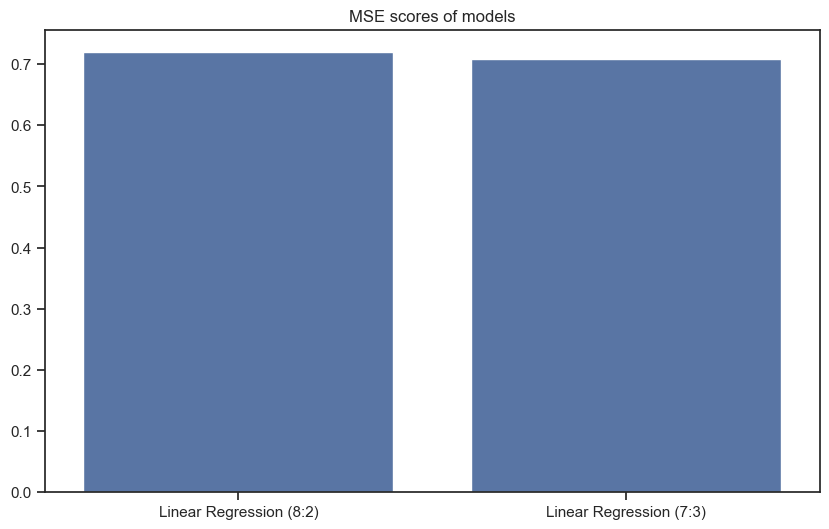

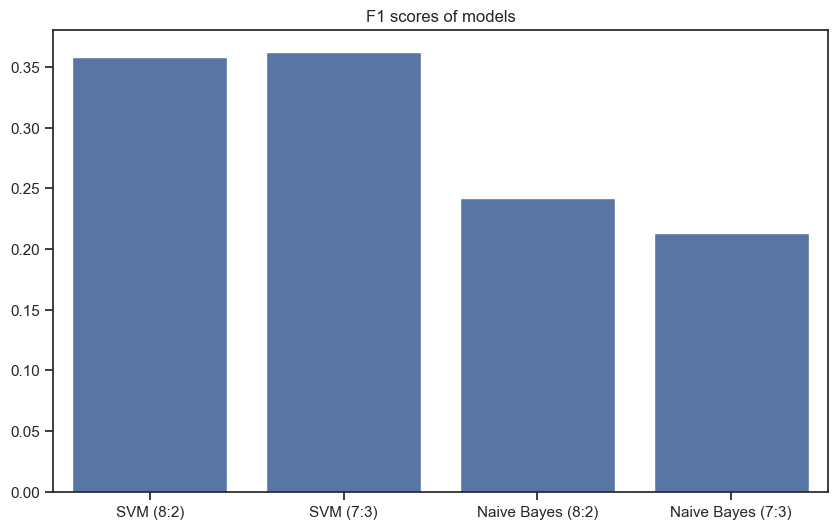

In [102]:
from sklearn.metrics import mean_squared_error, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Tính MSE cho mô hình Linear Regression
mse_linear_regression_8_2 = mean_squared_error(y_test_8_2, linear_regression.predict(X_test_8_2))
mse_linear_regression_7_3 = mean_squared_error(y_test_7_3, linear_regression.predict(X_test_7_3))
print("MSE của Linear Regression (8:2):", mse_linear_regression_8_2)
print("MSE của Linear Regression (7:3):", mse_linear_regression_7_3)

# Tính F1 score cho mô hình SVM
f1_score_svm_8_2 = f1_score(y_test_8_2, svm.predict(X_test_8_2) ,  average='macro') # average='micro' or 'macro' or 'weighted'
f1_score_svm_7_3 = f1_score(y_test_7_3, svm.predict(X_test_7_3) , average='macro')

# Tính F1 score cho mô hình Bayes
f1_score_bayes_8_2 = f1_score(y_test_8_2, naive_bayes.predict(X_test_8_2) , average='macro') # average='macro' or 'macro
f1_score_bayes_7_3 = f1_score(y_test_7_3, naive_bayes.predict(X_test_7_3) , average='macro')

# Trực quan hóa kết quả
models = ['Linear Regression (8:2)', 'Linear Regression (7:3)', 'SVM (8:2)', 'SVM (7:3)', 'Naive Bayes (8:2)', 'Naive Bayes (7:3)']
mse_scores = [mse_linear_regression_8_2, mse_linear_regression_7_3, None, None, None, None]
f1_scores = [None, None, f1_score_svm_8_2, f1_score_svm_7_3, f1_score_bayes_8_2, f1_score_bayes_7_3]

plt.figure(figsize=(10, 6))
sns.barplot(x=models[:2], y=mse_scores[:2])
plt.title("MSE scores of models")
# plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=models[2:], y=f1_scores[2:])
plt.title("F1 scores of models")
# plt.xticks(rotation=45)
plt.show()

11. Tính độ đo Accuracy cho các mô hình Linear Regression, SVM, Bayes với bộ dữ liệu với 2 tỉ lệ ở trên, trực quan hóa kết quả đạt được.    


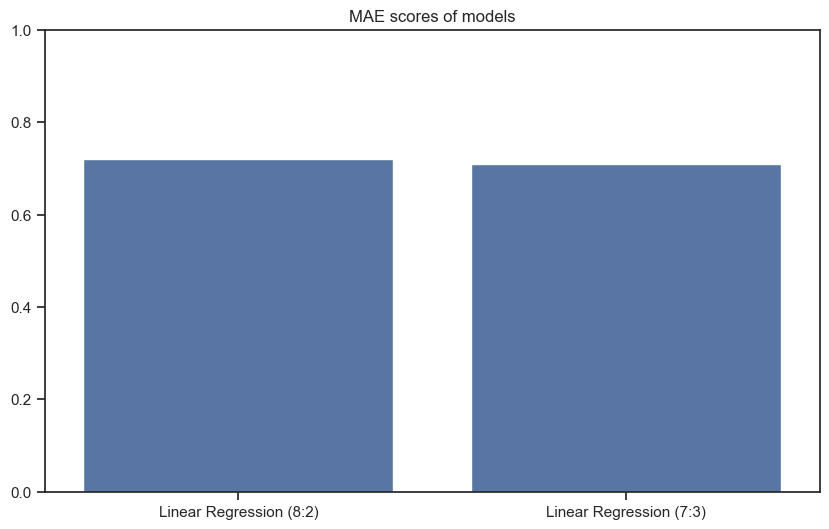

In [109]:
import numpy as np

# Tính MAE cho mô hình Linear Regression
mae_linear_regression_8_2 = np.mean(np.abs(y_test_8_2 - linear_regression.predict(X_test_8_2)))
mae_linear_regression_7_3 = np.mean(np.abs(y_test_7_3 - linear_regression.predict(X_test_7_3)))

# Trực quan hóa kết quả
models = ['Linear Regression (8:2)', 'Linear Regression (7:3)', 'SVM (8:2)', 'SVM (7:3)', 'Naive Bayes (8:2)', 'Naive Bayes (7:3)']
mae_scores = [mse_linear_regression_8_2, mse_linear_regression_7_3, None, None, None, None]

plt.figure(figsize=(10, 6))
sns.barplot(x=models[:2], y=mse_scores[:2])
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.title("MAE scores of models")
plt.show()



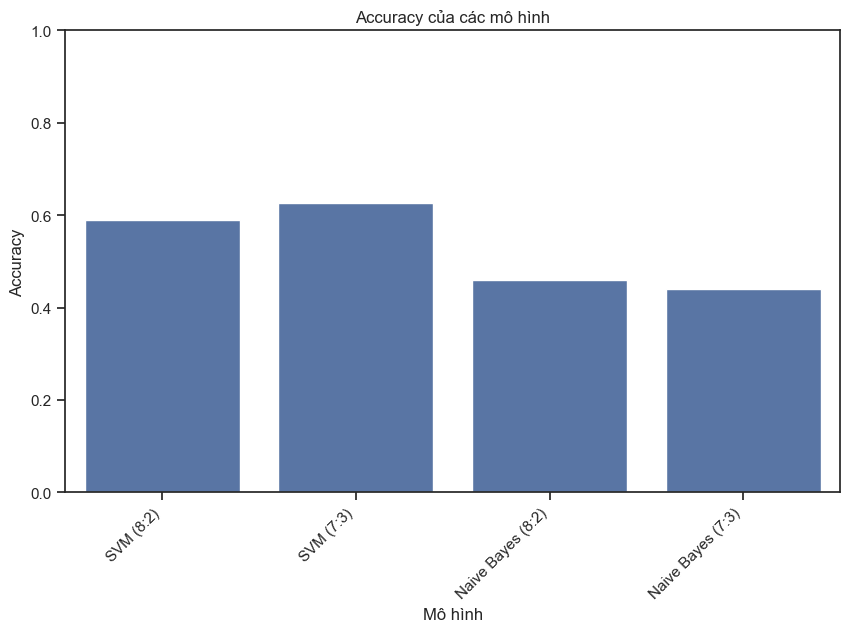

In [106]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Tính độ đo Accuracy cho mô hình SVM
accuracy_svm_8_2 = accuracy_score(y_test_8_2, svm.predict(X_test_8_2))
accuracy_svm_7_3 = accuracy_score(y_test_7_3, svm.predict(X_test_7_3))

# Tính độ đo Accuracy cho mô hình Bayes
accuracy_bayes_8_2 = accuracy_score(y_test_8_2, naive_bayes.predict(X_test_8_2))
accuracy_bayes_7_3 = accuracy_score(y_test_7_3, naive_bayes.predict(X_test_7_3))

# Trực quan hóa kết quả
models = ['Linear Regression (8:2)', 'Linear Regression (7:3)', 'SVM (8:2)', 'SVM (7:3)', 'Naive Bayes (8:2)', 'Naive Bayes (7:3)']
accuracies = [None, None, accuracy_svm_8_2, accuracy_svm_7_3, accuracy_bayes_8_2, accuracy_bayes_7_3]

plt.figure(figsize=(10, 6))
sns.barplot(x=models[2:], y=accuracies[2:])
plt.title("Accuracy của các mô hình")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.xlabel("Mô hình")
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.show()


12. Tính độ đo Confusion Matrix cho các mô hình Linear Regression, SVM, Bayes với bộ dữ liệu với 2 tỉ lệ ở trên, trực quan hóa kết quả đạt được.  


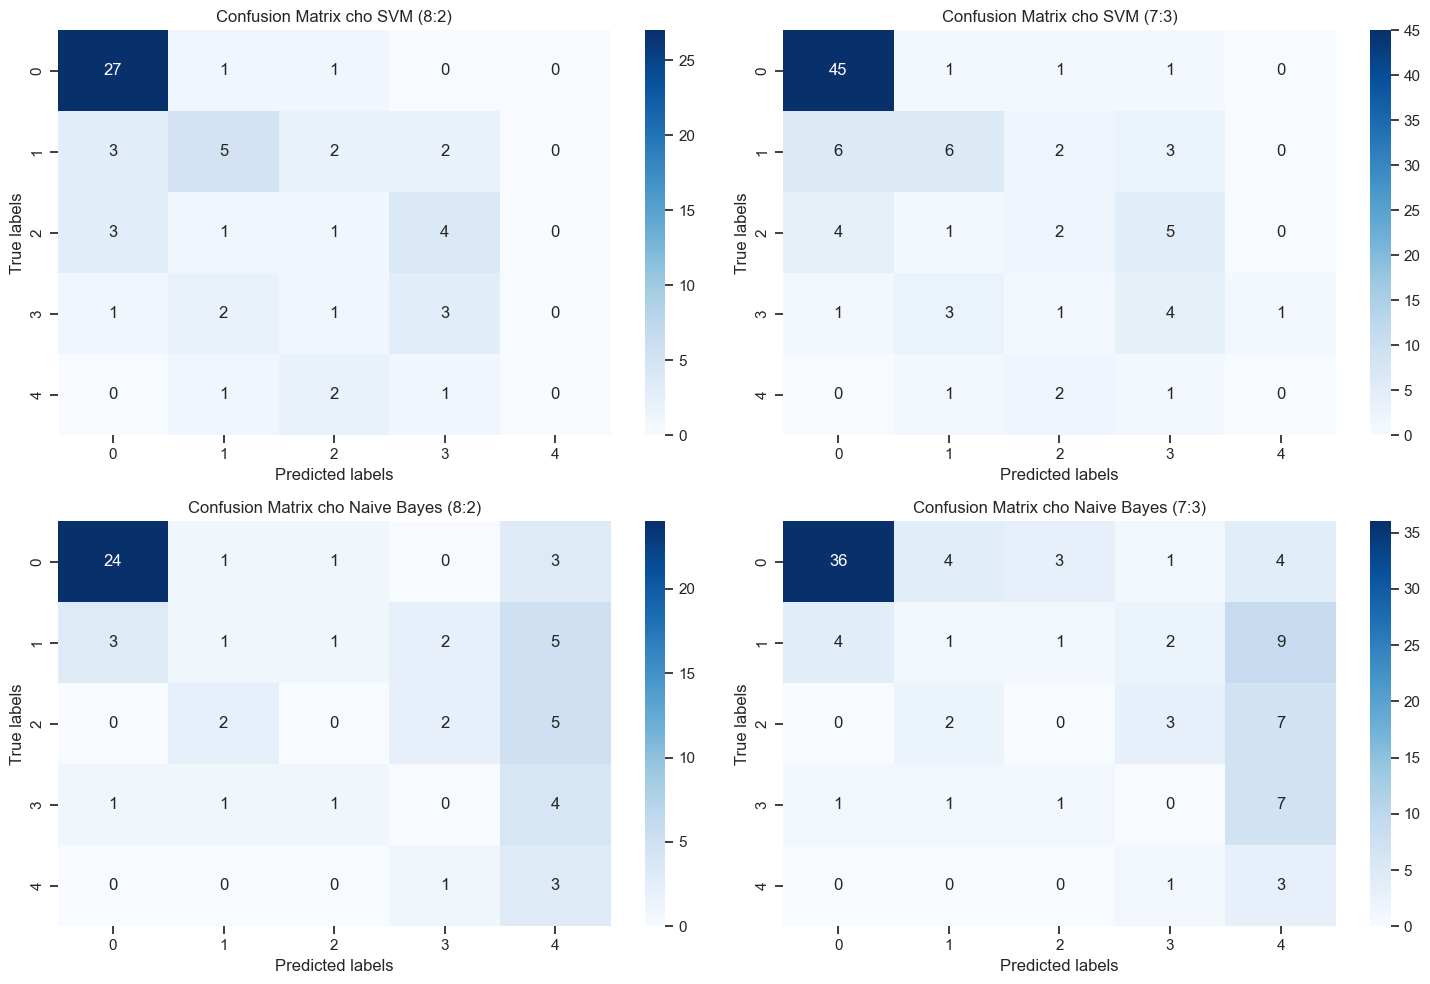

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính Confusion Matrix cho mô hình SVM (8:2)
cm_svm_8_2 = confusion_matrix(y_test_8_2, svm.predict(X_test_8_2))

# Tính Confusion Matrix cho mô hình SVM (7:3)
cm_svm_7_3 = confusion_matrix(y_test_7_3, svm.predict(X_test_7_3))

# Tính Confusion Matrix cho mô hình Bayes (8:2)
cm_bayes_8_2 = confusion_matrix(y_test_8_2, naive_bayes.predict(X_test_8_2))

# Tính Confusion Matrix cho mô hình Bayes (7:3)
cm_bayes_7_3 = confusion_matrix(y_test_7_3, naive_bayes.predict(X_test_7_3))

# Trực quan hóa kết quả
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(cm_svm_8_2, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix cho SVM (8:2)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(2, 2, 2)
sns.heatmap(cm_svm_7_3, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix cho SVM (7:3)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(2, 2, 3)
sns.heatmap(cm_bayes_8_2, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix cho Naive Bayes (8:2)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(2, 2, 4)
sns.heatmap(cm_bayes_7_3, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix cho Naive Bayes (7:3)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.tight_layout()
plt.show()


13. So sánh các kết quả ở câu 10, 11, 12 bằng các biểu đồ, nhận xét về các biểu đồ này


14. Lưu model với giải thuật đạt kết quả tốt nhất ở mỗi tỉ lệ dữ liệu.  


In [113]:
import joblib

# Lưu mô hình SVM với tỉ lệ Train/Test là 8:2
joblib.dump(svm, 'svm_model_8_2.pkl')

# Lưu mô hình SVM với tỉ lệ Train/Test là 7:3
joblib.dump(svm, 'svm_model_7_3.pkl')


['svm_model_7_3.pkl']

15. Xây dựng ứng dụng với đầu vào là 1 dữ liệu hay từ 1 file, in kết quả ra màn hình.


In [122]:
import pandas as pd
import joblib

# Load SVM model
svm_model = joblib.load('svm_model_8_2.pkl')  # Load mô hình SVM đã lưu trước đó

# Function to predict using SVM model
def predict_label(input_data):
    # Xử lý dữ liệu đầu vào và chuyển đổi thành định dạng phù hợp (ví dụ: ma trận numpy)
    processed_data = process_input(input_data)
    # Dự đoán nhãn cho dữ liệu đầu vào
    predicted_label = svm_model.predict(processed_data)
    return predicted_label

# Hàm xử lý dữ liệu đầu vào (có thể cần thay đổi dựa trên loại dữ liệu và mô hình)
def process_input(input_data):
    # Ví dụ: chuyển đổi dữ liệu đầu vào thành một ma trận numpy
    processed_data = np.array([input_data])  # Ví dụ: input_data là một list, array, hoặc chuỗi
    return processed_data

# Hàm main để chạy ứng dụng
def main():
    # Nhập dữ liệu từ người dùng
    input_data = input("Nhập dữ liệu: ")

    # Dự đoán nhãn dựa trên dữ liệu nhập vào
    predicted_label = predict_label(input_data)

    # In kết quả ra màn hình
    print("Nhãn dự đoán:", predicted_label)

# Chạy hàm main khi script được chạy
if __name__ == "__main__":
    main()
    


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[63.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [121]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
